In [3]:
import os, sys
os.environ['R_HOME'] = sys.exec_prefix + '/lib/R/'
import numpy as np
import scanpy as sc
import scFates as scf
import matplotlib.pyplot as plt

In [39]:
geo = 'GSE136689'
pth = os.path.join('..', '..')
pth_data = os.path.join(pth, 'data')
pth_in = os.path.join(pth_data, 'processed')
pth_out = os.path.join(pth_data, 'trajectories')
pth_feat = os.path.join(pth_data, 'features')
pth_fig = os.path.join(pth, 'figures', 'preprocessing')

In [ ]:
adata = sc.read_h5ad(os.path.join(pth_in, f'{geo}.h5ad'))
adata

AnnData object with n_obs × n_vars = 10097 × 17462
    obs: 'Stages', 'Clusters', 'Type', 'LineageAnnotations', 'celltype'
    var: 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    uns: 'Stages_colors', 'celltype_colors', 'diffmap_evals', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

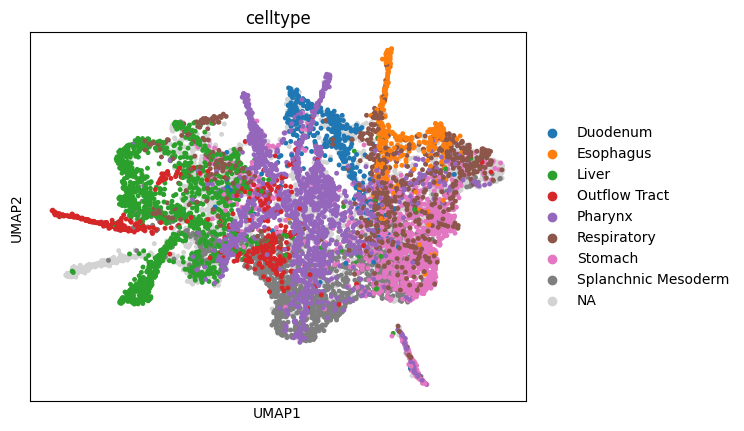

In [4]:
sc.pl.umap(adata, color = 'celltype', size = 50)

In [ ]:
adata = adata[adata.obs.celltype == 'Splanchnic Mesoderm'].copy()
adata

View of AnnData object with n_obs × n_vars = 1379 × 17462
    obs: 'Stages', 'Clusters', 'Type', 'LineageAnnotations', 'celltype'
    var: 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    uns: 'Stages_colors', 'celltype_colors', 'diffmap_evals', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [7]:
sc.tl.leiden(adata, resolution = .5)

/tmp/ipykernel_3657688/3092964041.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = .5)
/home/caleb/miniconda3/envs/scFates/lib/python3.11/site-packages/scanpy/tools/_leiden.py:198: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_added] = pd.Categorical(


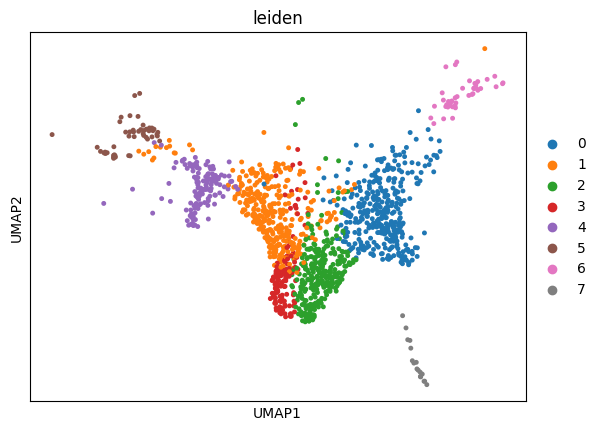

In [8]:
sc.pl.umap(adata, color = 'leiden', size = 50)

In [ ]:
remove = np.arange(4, 8).astype(str)
adata = adata[~adata.obs.leiden.isin(remove)]
adata

View of AnnData object with n_obs × n_vars = 1144 × 17462
    obs: 'Stages', 'Clusters', 'Type', 'LineageAnnotations', 'celltype', 'leiden'
    var: 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    uns: 'Stages_colors', 'celltype_colors', 'diffmap_evals', 'log1p', 'neighbors', 'pca', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_diffmap', 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

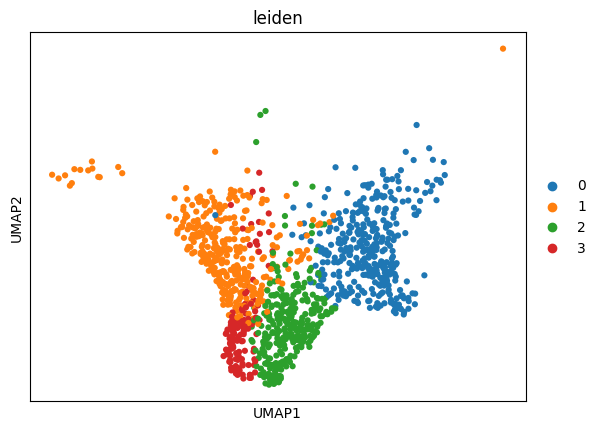

In [11]:
sc.pl.umap(adata, color = 'leiden', size = 80)

In [12]:
sc.pp.neighbors(adata, n_neighbors = 100, use_rep = 'X_diffmap')

/home/caleb/miniconda3/envs/scFates/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
sc.tl.umap(adata)

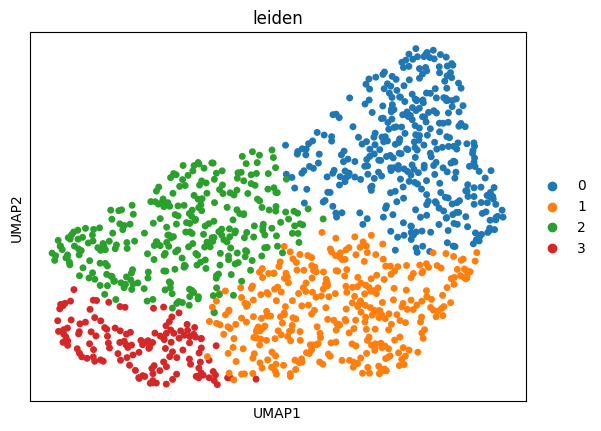

In [14]:
sc.pl.umap(adata, color = 'leiden', size = 100)

inferring a principal curve --> parameters used 
    15 principal points, mu = 100, lambda = 0.01
    finished (0:00:00) --> added 
    .uns['epg'] dictionnary containing inferred elastic curve generated from elpigraph.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'], coordinates of principal points in representation space.


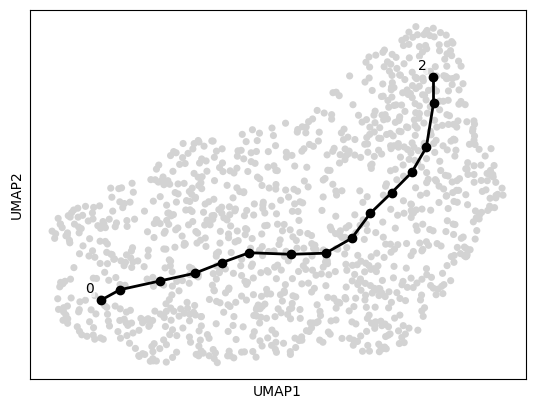

In [15]:
scf.tl.curve(adata, Nodes = 15, epg_lambda = .01, epg_mu = 100, use_rep = 'X_umap', plot = True, basis = 'umap')

In [16]:
scf.tl.root(adata, 0)

node 0 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [17]:
scf.tl.pseudotime(adata)

projecting cells onto the principal graph
    finished (0:00:00) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


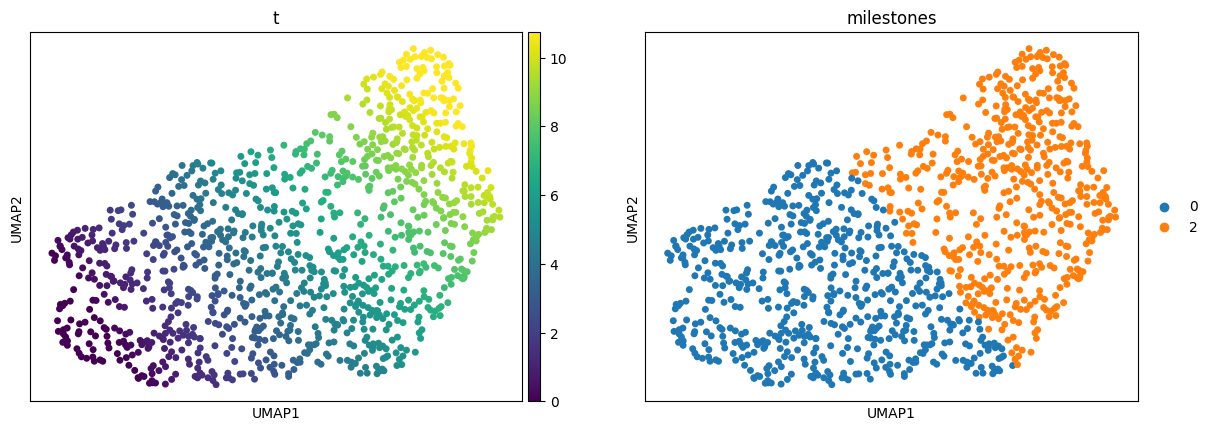

In [18]:
sc.pl.umap(adata, color = ['t', 'milestones'], size = 100)

/home/caleb/miniconda3/envs/scFates/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


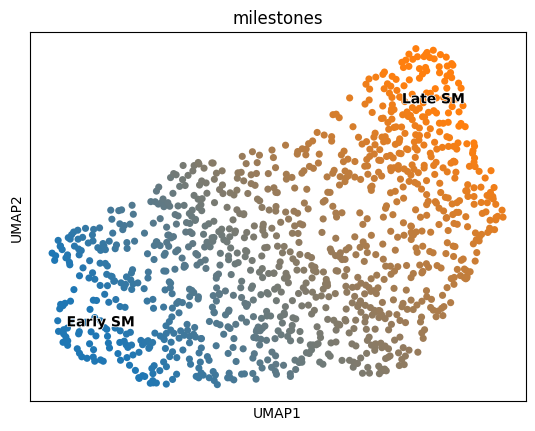

In [ ]:
scf.tl.rename_milestones(adata, new = {'0' : 'Early SM', '2' : 'Late SM'})
scf.pl.milestones(adata, basis = 'umap', annotate = True)

In [20]:
scf.tl.test_association(adata, n_jobs = 8)

test features for association with the trajectory
    single mapping : 100%|██████████| 17462/17462 [02:45<00:00, 105.77it/s]
    found 18 significant features (0:02:45) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


In [21]:
scf.tl.test_association(adata, reapply_filters = True, A_cut = .5)

reapplied filters, 80 significant features


In [22]:
scf.tl.fit(adata, n_jobs = 8)

fit features associated with the trajectory
    single mapping :   0%|          | 0/80 [00:00<?, ?it/s]

    single mapping : 100%|██████████| 80/80 [00:01<00:00, 44.60it/s]
    finished (adata subsetted to keep only fitted features!) (0:00:01) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


In [ ]:
del adata.uns['epg']
adata.write(os.path.join(pth_out, f'{geo}.h5ad'))

In [ ]:
np.savetxt(os.path.join(pth_feat, f'{geo}.txt'), adata.var_names, fmt = '%s')

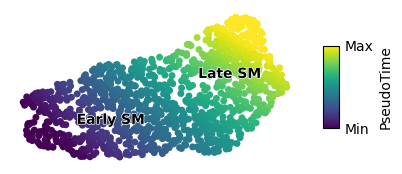

In [40]:
s = 100
fig, ax = plt.subplots(1, 1, figsize = (4.25, 2))
sc.pl.umap(adata, color = 't', size = s, colorbar_loc = None,
           frameon = False, show = False, ax = ax)
sc.pl.umap(adata, color = 'milestones', size = s, alpha = 0,
           legend_loc = 'on data', legend_fontoutline = 1,
           frameon = False, show = False, ax = ax)
ax.set_title(''); m = ax.collections[0]
cbar = fig.colorbar(m, label = 'PseudoTime', fraction = .05,
                    pad = .07, aspect = 5, ax = ax)
cbar.ax.set_yticks(m.get_clim(), ['Min', 'Max'])
cbar.ax.tick_params(size = 0)
fn = os.path.join(pth_fig, 'trajectories', f'{geo}.pdf')
plt.savefig(fn, bbox_inches = 'tight')

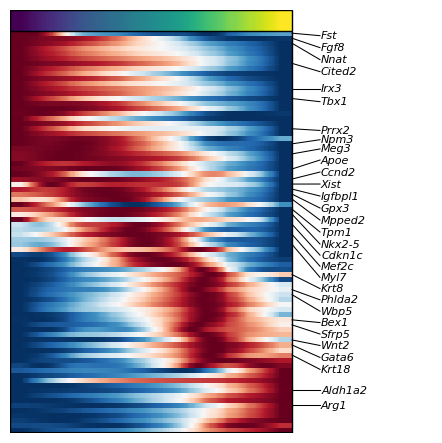

In [44]:
ax = scf.pl.trends(adata, features = adata.var_names,
                   ordering = 'quantile', n_features = 30,
                   offset_names = .1, fontsize = 8,
                   style = 'italic', plot_emb = False,
                   figsize = (6, 5.5), show = False)
fn = os.path.join(pth_fig, 'features', f'{geo}.pdf')
plt.savefig(fn, bbox_inches = 'tight')